In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Analyze Underground Metrics

In [40]:
projectPath = os.path.abspath(os.path.join(os.getcwd(), '..'))
underground_file = os.path.join(projectPath, 'sumoenv/scenarios/underground_alarm/social_groups/21111008_21111014/sf_final_metrics.csv')
df_under = pd.read_csv(underground_file)
df_under.columns

Index(['timestamp', 'passengers_new', 'passengers_departures',
       'passengers_arrivals', 'passengers_unassigned', 'passengers_assigned',
       'passengers_accept', 'passengers_reject', 'passengers_cancel',
       'drivers_shift_duration_avg', 'drivers_total_length_avg',
       'drivers_idle_duration_avg', 'drivers_occupied_distance_avg',
       'drivers_occupied_duration_avg', 'drivers_passengers_served',
       'drivers_idle', 'drivers_pickup', 'drivers_busy', 'drivers_accept',
       'drivers_reject', 'drivers_removed', 'rides_in_progress',
       'rides_waiting_duration_avg', 'rides_duration_avg', 'rides_length_avg',
       'rides_duration_expected_avg', 'rides_length_expected_avg',
       'rides_dispatched', 'rides_partial_acceptances', 'rides_not_served',
       'rides_offers_generated', 'rides_offers_radius_avg',
       'rides_offers_price_avg', 'rides_offers_surge_avg',
       'traffic_in_progress', 'traffic_departures', 'traffic_arrivals',
       'traffic_duration_avg', 't

/var/folders/03/ywz8jzld3gs1b0zsd9kydy940000gq/T/ipykernel_32917/1635646486.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_under[col] = df_under[col].fillna(method='ffill')


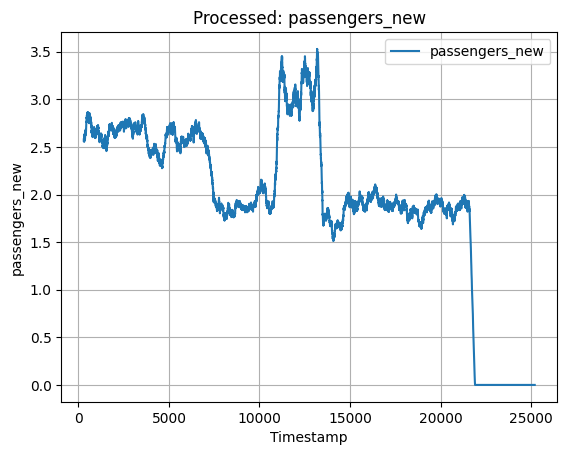

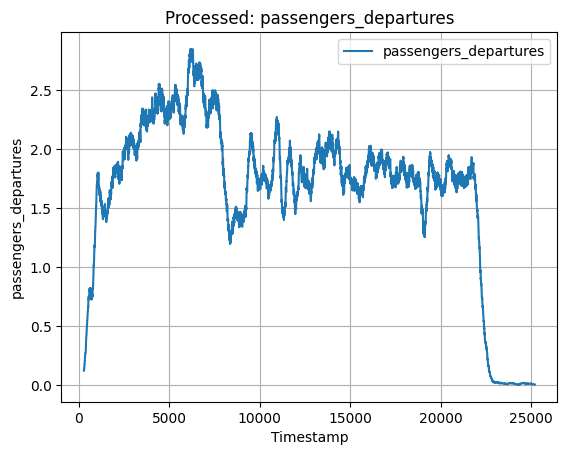

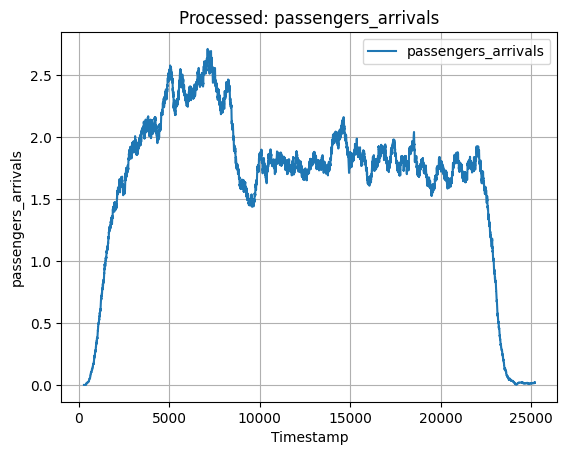

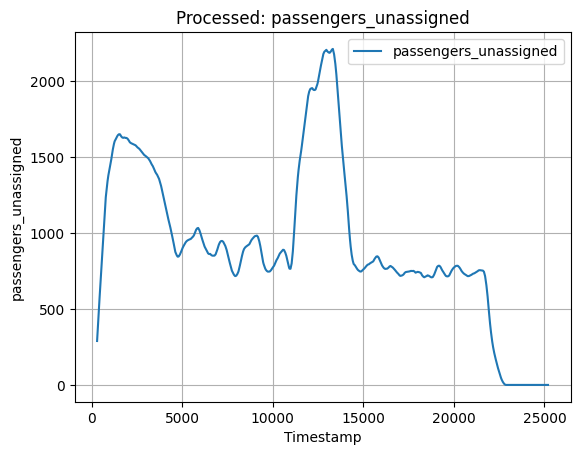

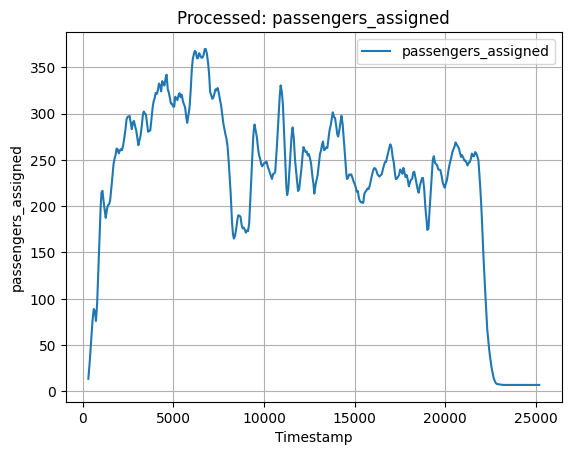

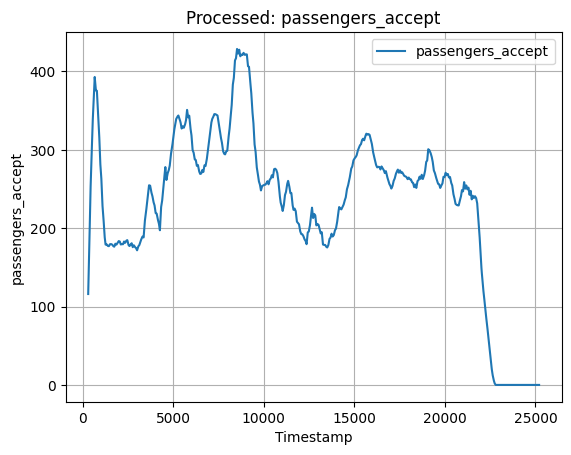

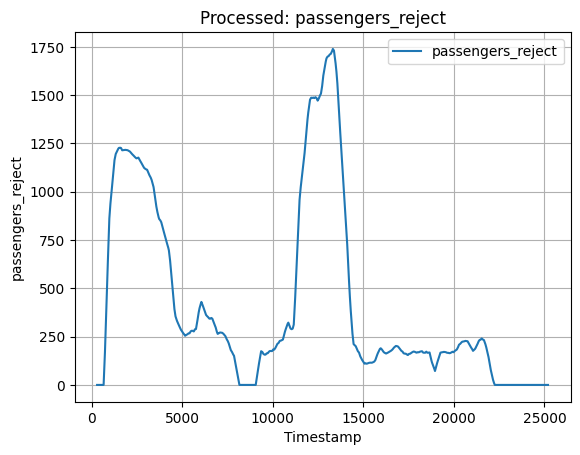

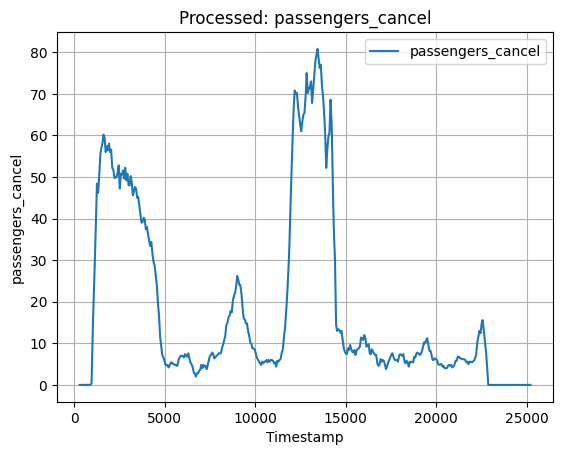

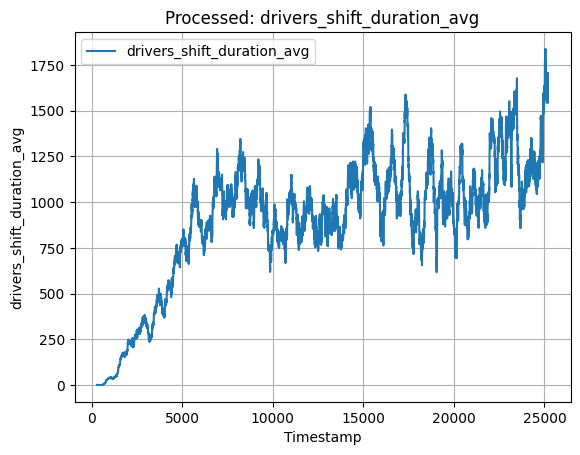

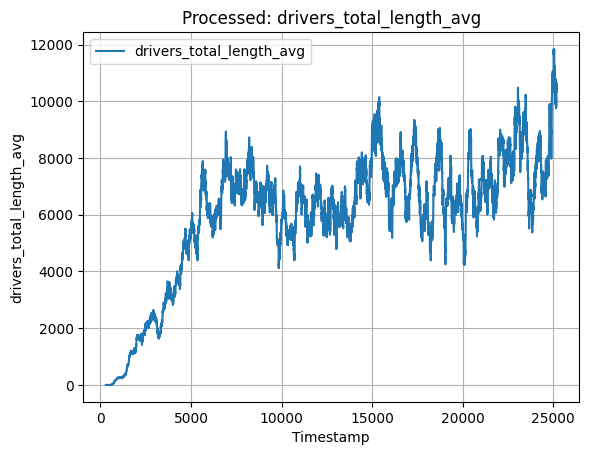

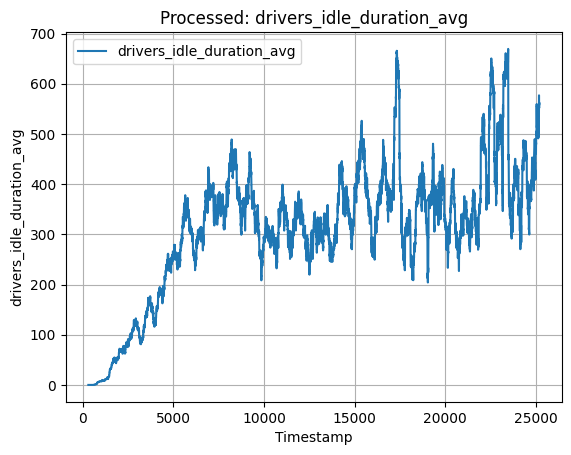

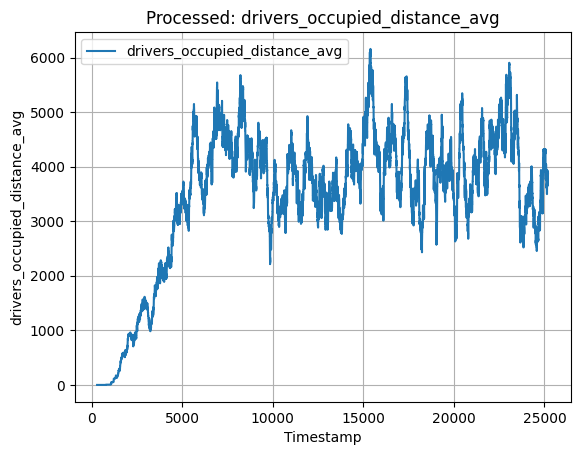

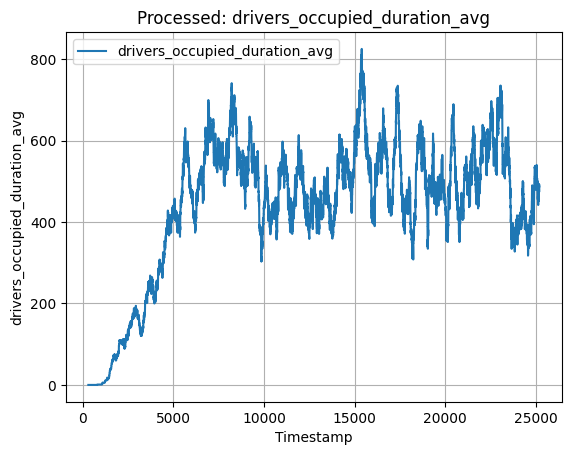

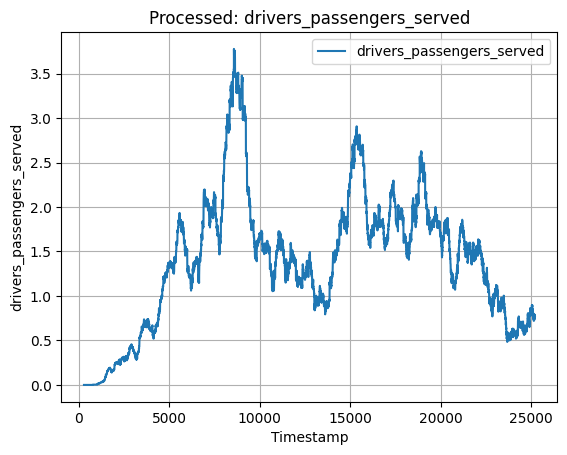

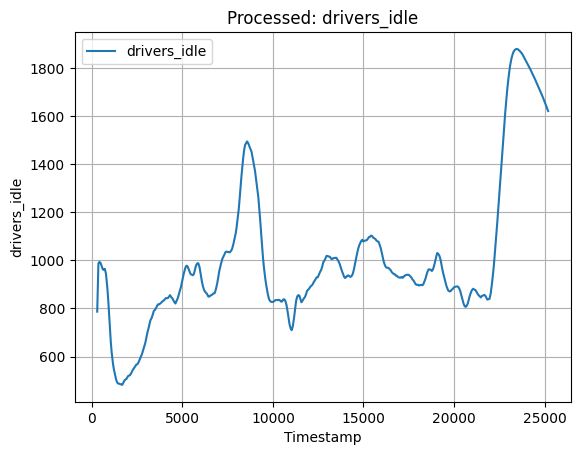

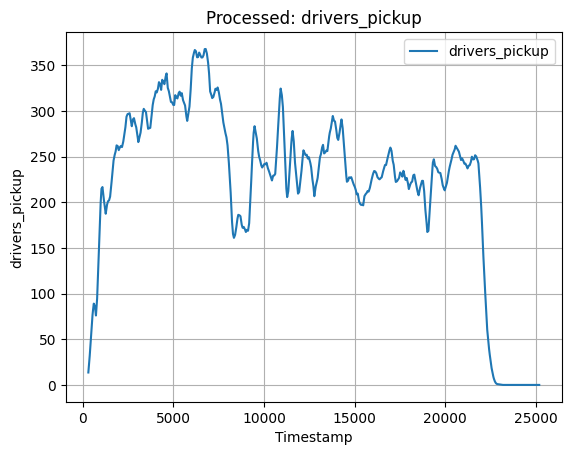

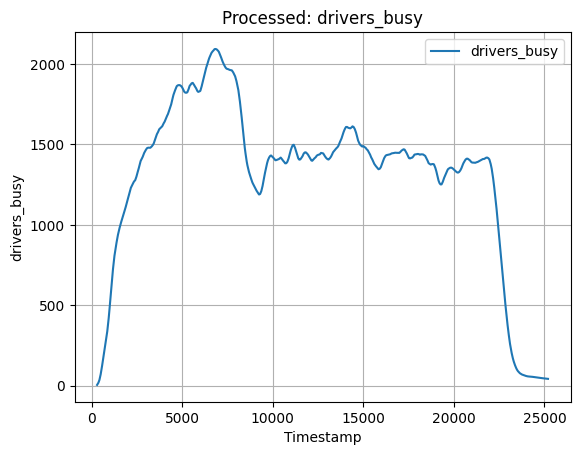

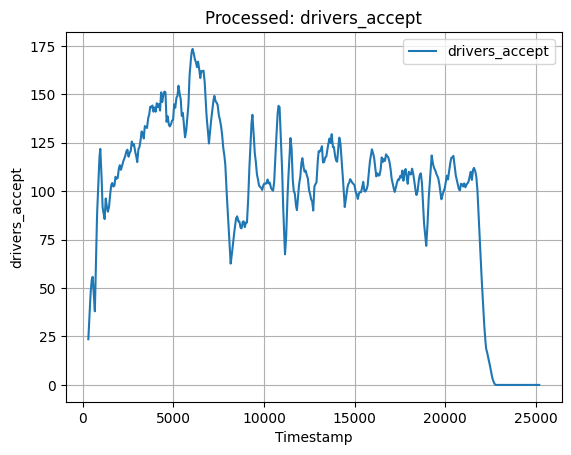

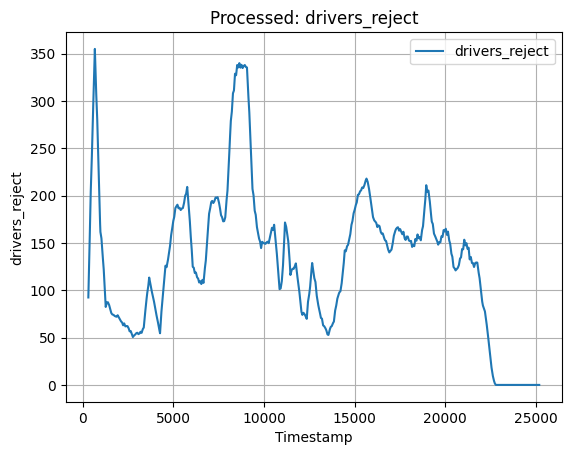

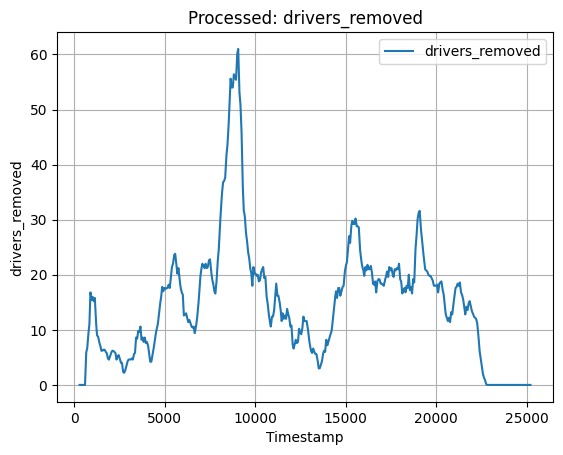

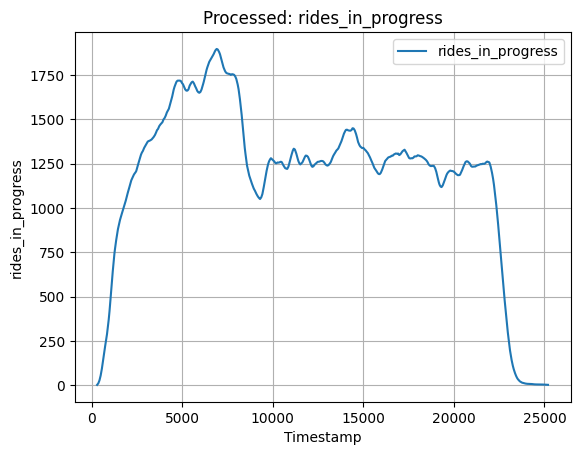

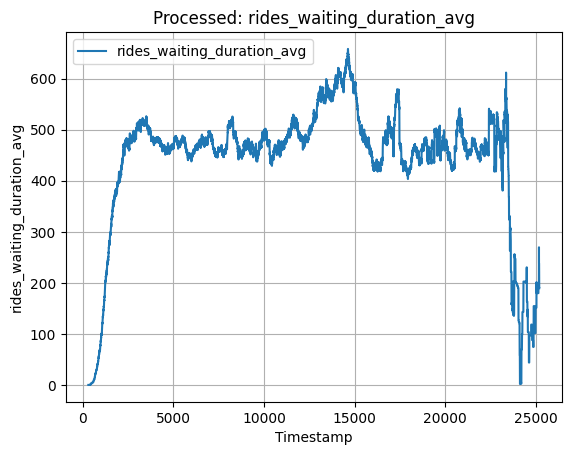

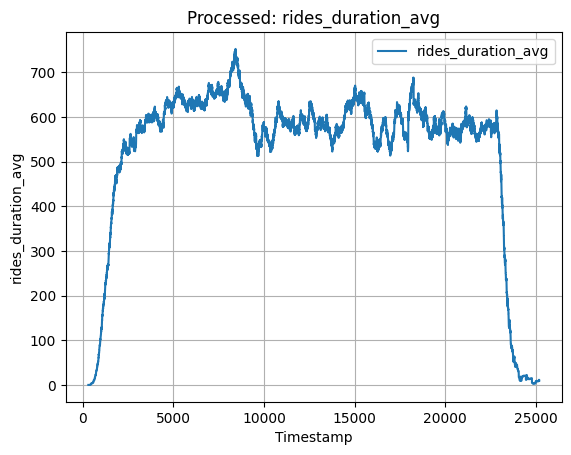

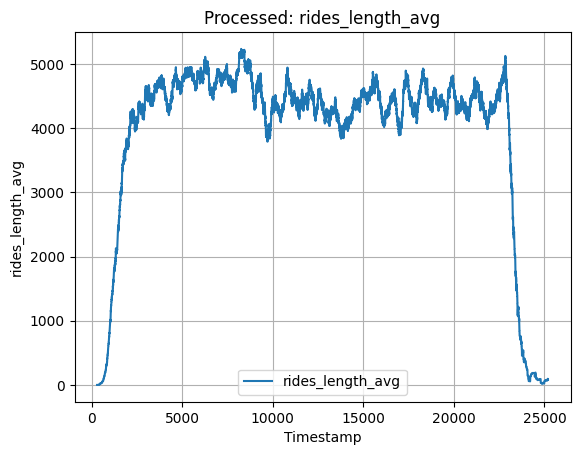

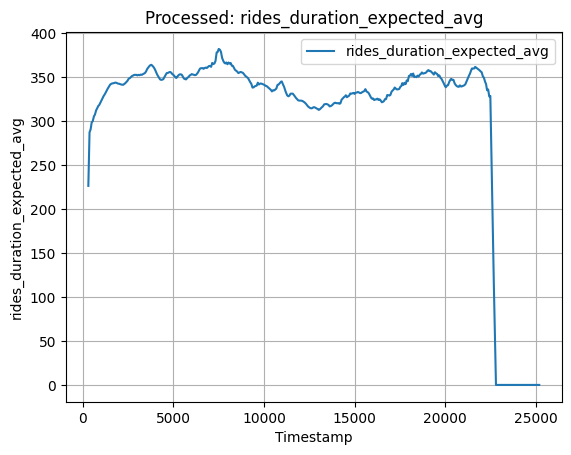

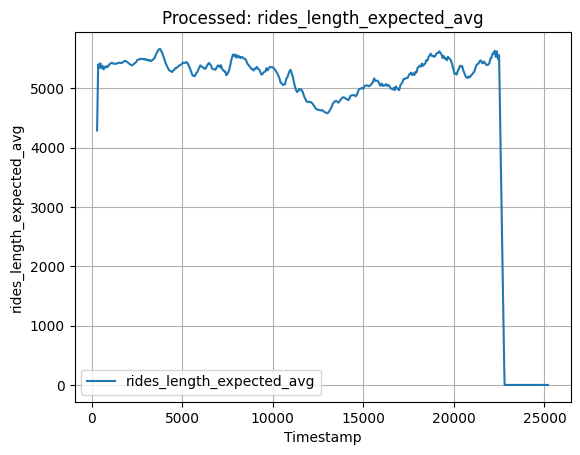

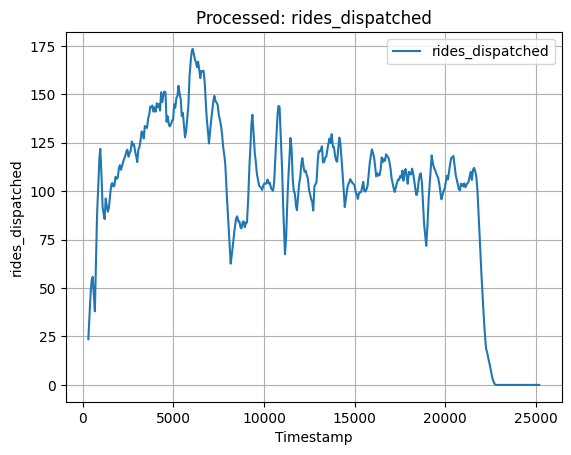

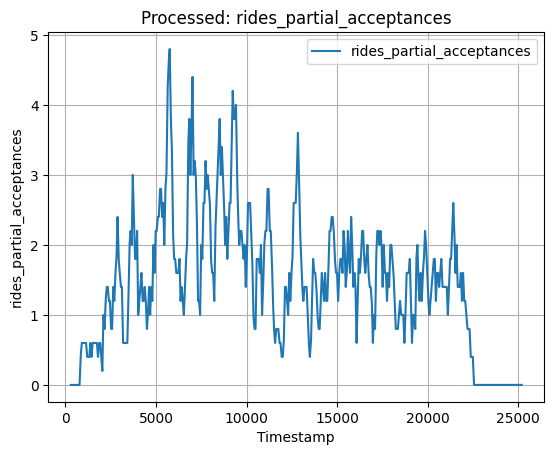

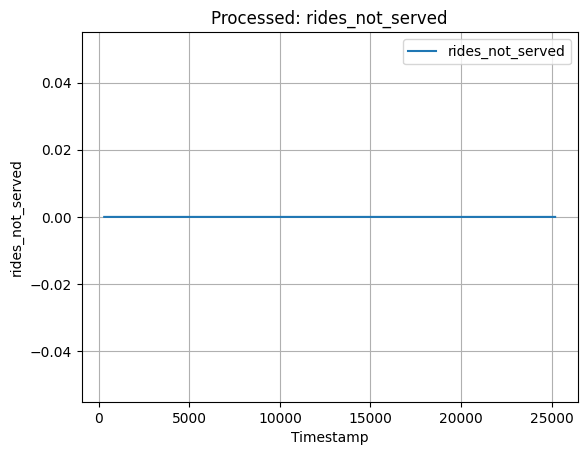

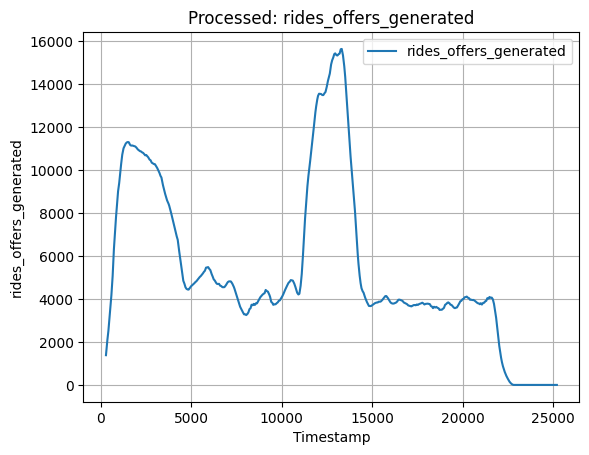

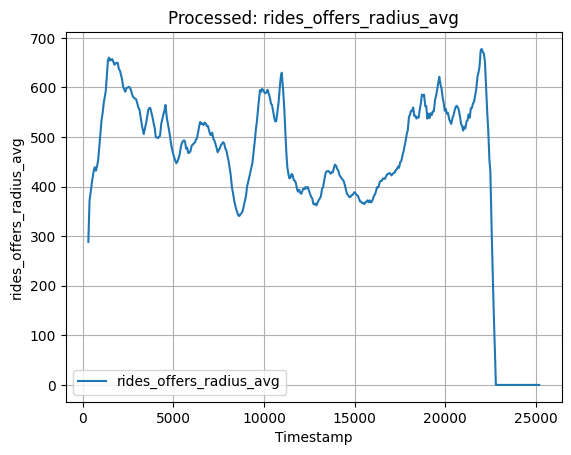

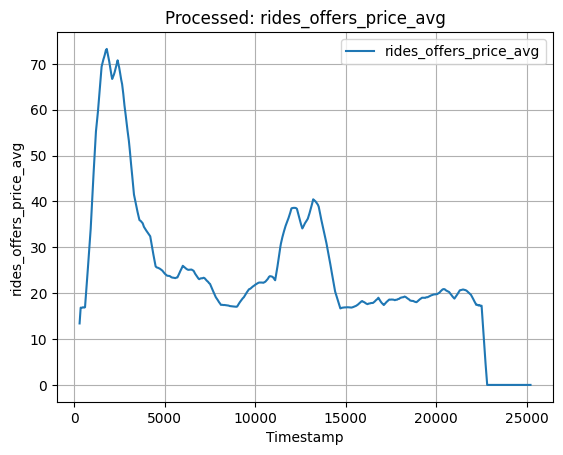

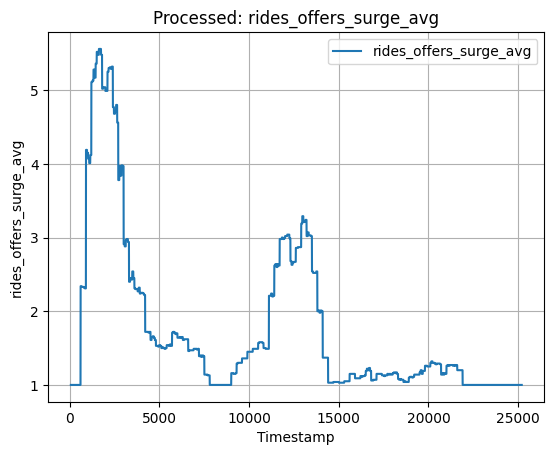

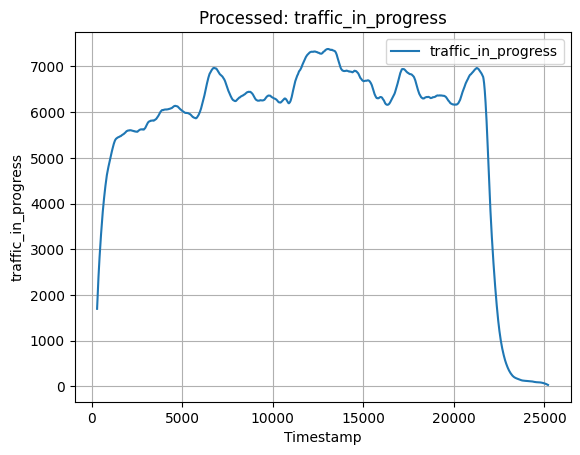

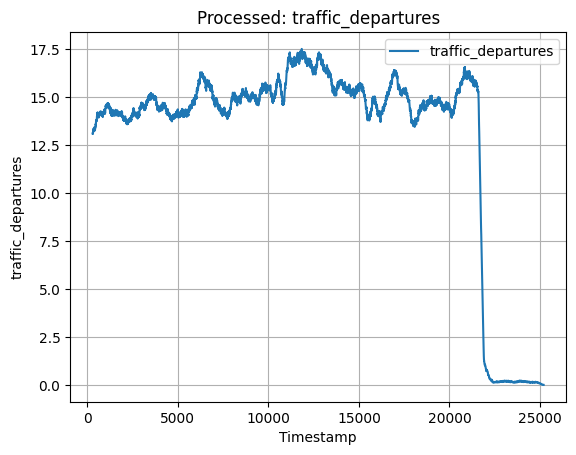

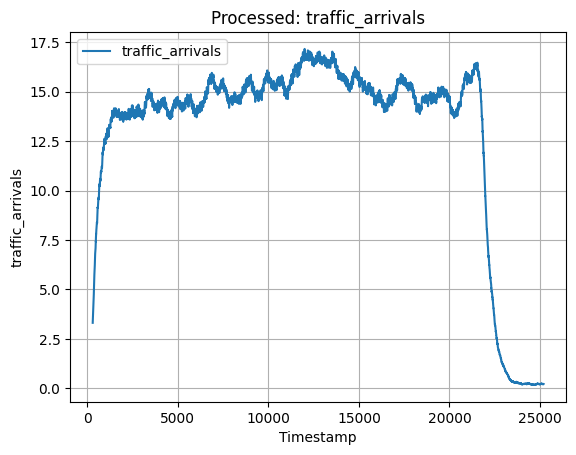

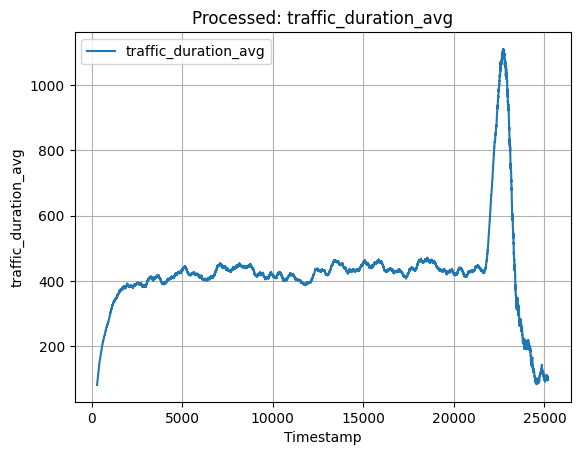

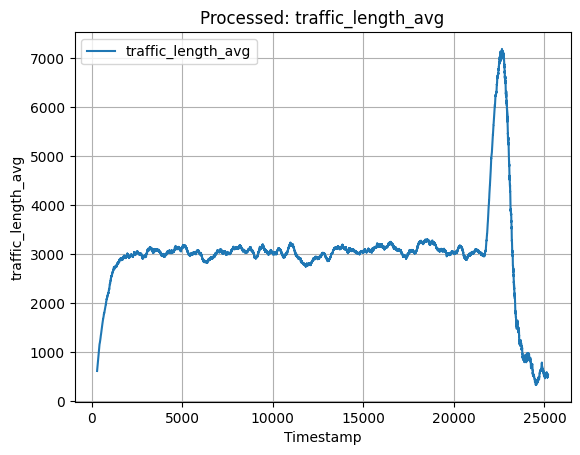

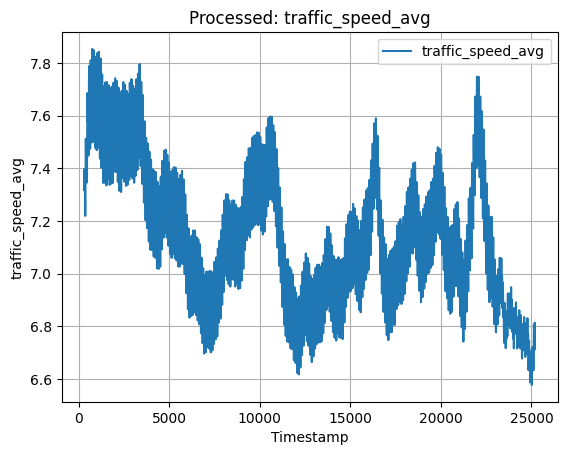

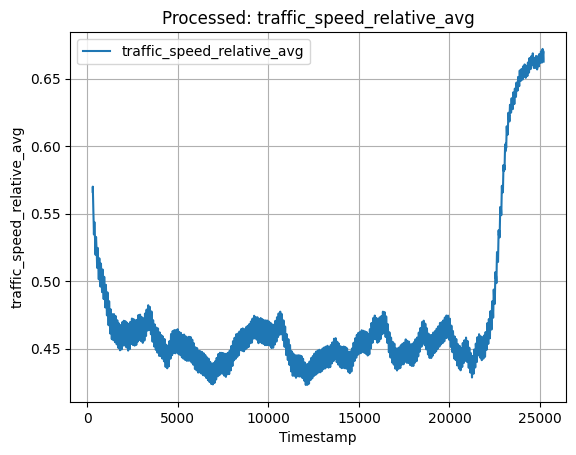

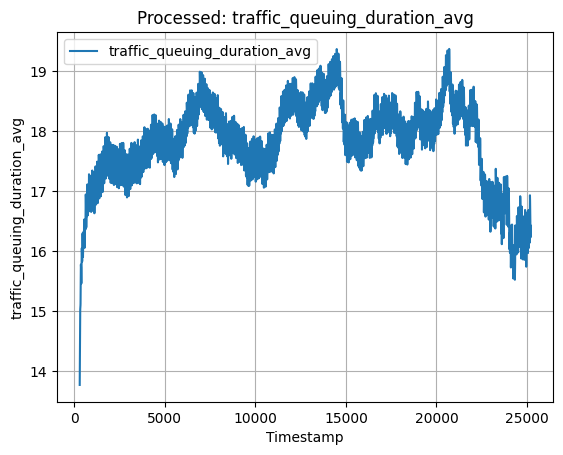

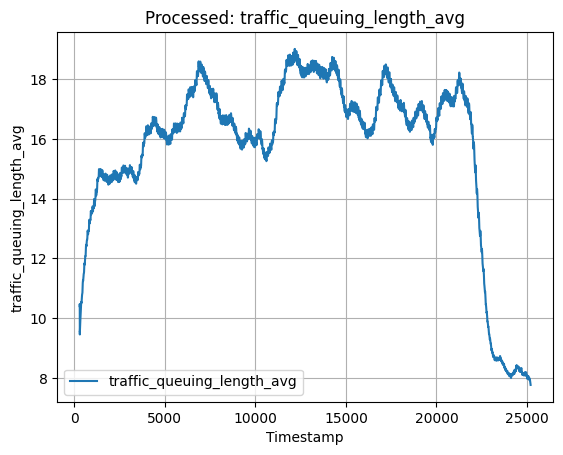

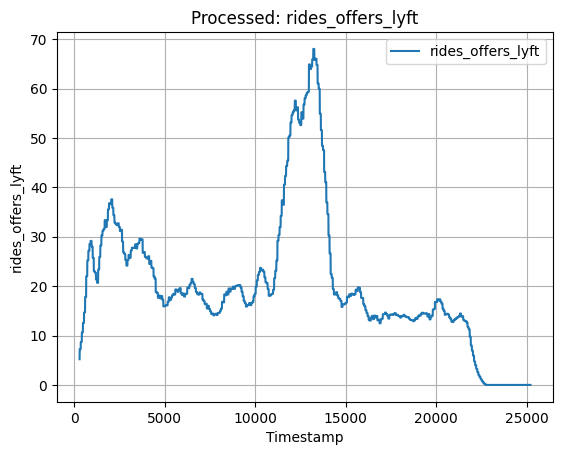

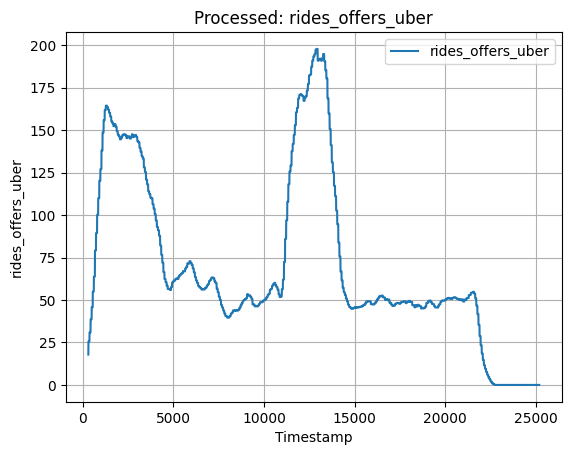

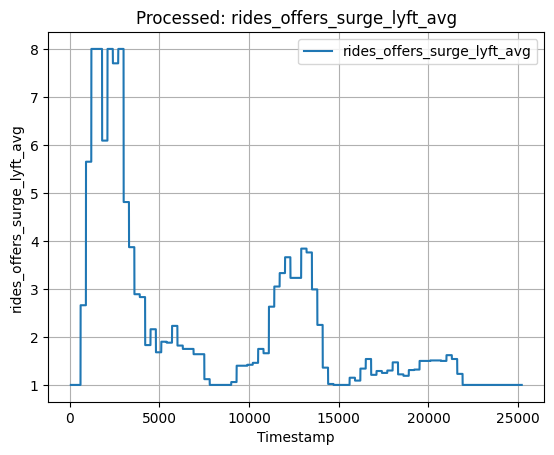

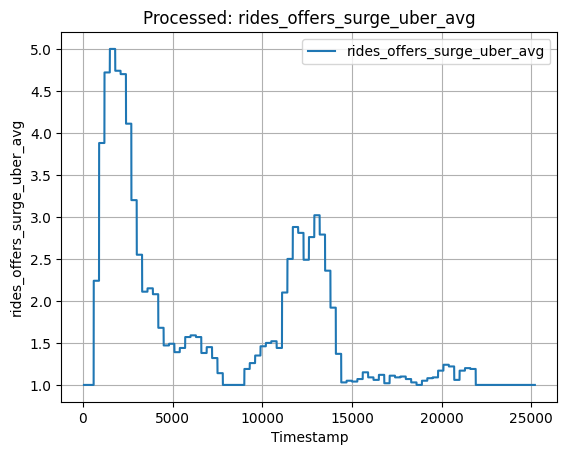

In [41]:
# Surge multiplier columns that shouldn't be smoothed but padded
surge_columns = [
    "rides_offers_surge_avg",
    "rides_offers_surge_lyft_avg",
    "rides_offers_surge_uber_avg"
]
# Agents columns that should be padded with forward-fill every 60 seconds before smoothing
agent_columns = [
    "passengers_unassigned",
    "passengers_assigned",
    "passengers_accept",
    "passengers_reject",
    "passengers_cancel",
    "drivers_idle",
    "drivers_pickup",
    "drivers_busy",
    "drivers_accept",
    "drivers_reject",
    "drivers_removed",
    "rides_duration_expected_avg",
    "rides_length_expected_avg",
    "rides_offers_radius_avg",
    "rides_offers_price_avg",
    "rides_dispatched",
    "rides_in_progress",
    "rides_offers_generated",
    "rides_partial_acceptances"
]

# Process the surge_columns: pad with forward-fill
for col in surge_columns:
    df_under[col] = df_under[col].replace(0, np.nan)
    df_under[col] = df_under[col].fillna(method='ffill')

# Process the agent_columns: pad with forward-fill
for col in agent_columns:
    for i in range(0, len(df_under), 60):
        val = df_under.at[i, col]
        df_under.loc[i:i+59, col] = val

# Apply rolling mean to all other columns
rolling_cols = [col for col in df_under.columns if col not in surge_columns + ["timestamp"]]
for col in rolling_cols:
    df_under[col] = df_under[col].rolling(window=300).mean().dropna()

# Plot each column (excluding timestamp)
for column in df_under.columns:
    if column == "timestamp":
        continue
    plt.figure()
    plt.plot(df_under["timestamp"], df_under[column], label=column)
    plt.title(f"Processed: {column}")
    plt.xlabel("Timestamp")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


## Compare with normal

/var/folders/03/ywz8jzld3gs1b0zsd9kydy940000gq/T/ipykernel_32917/3605195787.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


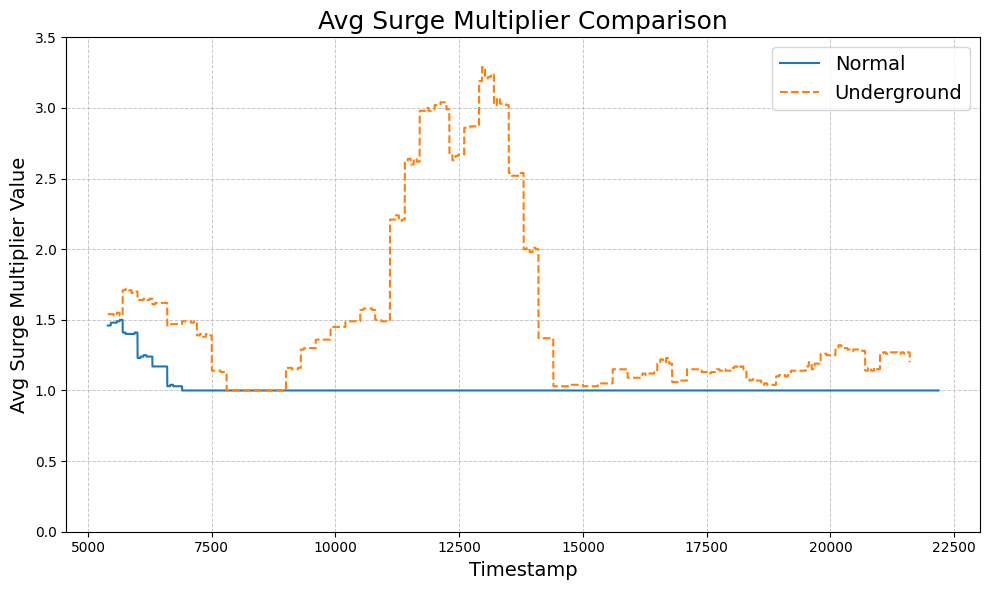

In [42]:
projectPath = os.path.abspath(os.path.join(os.getcwd(), '..'))
normal_file = os.path.join(projectPath, 'sumoenv/scenarios/normal/social_groups/21111008_21111014/sf_final_metrics.csv')
df = pd.read_csv(normal_file)

# Surge multiplier columns that shouldn't be smoothed but padded
surge_columns = [
    "rides_offers_surge_avg",
    "rides_offers_surge_lyft_avg",
    "rides_offers_surge_uber_avg"
]
# Agents columns that should be padded with forward-fill every 60 seconds before smoothing
agent_columns = [
    "passengers_unassigned",
    "passengers_assigned",
    "passengers_accept",
    "passengers_reject",
    "passengers_cancel",
    "drivers_idle",
    "drivers_pickup",
    "drivers_busy",
    "drivers_accept",
    "drivers_reject",
    "drivers_removed",
    "rides_duration_expected_avg",
    "rides_length_expected_avg",
    "rides_offers_radius_avg",
    "rides_offers_price_avg",
    "rides_dispatched",
    "rides_in_progress",
    "rides_offers_generated",
    "rides_partial_acceptances"
]

# Process the surge_columns: pad with forward-fill
for col in surge_columns:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(method='ffill')

# Process the agent_columns: pad with forward-fill
for col in agent_columns:
    for i in range(0, len(df), 60):
        val = df.at[i, col]
        df.loc[i:i+59, col] = val

# Apply rolling mean to all other columns
rolling_cols = [col for col in df.columns if col not in surge_columns + ["timestamp"]]
for col in rolling_cols:
    df[col] = df[col].rolling(window=300).mean().dropna()

df = df[5400:-7200]
df_under = df_under[5400:-3600]

plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["rides_offers_surge_avg"], label="Normal")
plt.plot(df_under["rides_offers_surge_avg"], label="Underground", linestyle='--')
plt.title(f"Avg Surge Multiplier Comparison", fontsize=18)
plt.xlabel("Timestamp", fontsize=14)
plt.ylabel("Avg Surge Multiplier Value", fontsize=14)
plt.ylim(0, 3.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("avg_surge_multiplier_comparison.png", dpi=300, bbox_inches='tight')
plt.show()